In [120]:
def packages():
    import os
    from PIL import Image
    import numpy as np
    import csv
    import matplotlib.pyplot as plt



In [121]:
os.getcwd()

'c:\\Users\\POOSHAN CHATTERJEE\\Documents\\MSc Data Science\\Research\\codes'

In [122]:
# main image dataset path
image_dir_path=r"C:\Users\POOSHAN CHATTERJEE\Documents\MSc Data Science\Research\dataset\compressed"

# test image dataset path
#image_dir_path=r"C:\Users\POOSHAN CHATTERJEE\Documents\MSc Data Science\Research\dataset\test"

# Loading the Images

In [123]:
#load_images is a function that loads the images

def load_images(root_dir): #Here root_dir is the directory that contains the image files
    images=[]
    for photo in os.listdir(root_dir):
        if photo.endswith(".jpg"):
            image=Image.open(os.path.join(root_dir,photo))
            images.append(image)
            
    return images



# Showing the images

C:\Users\POOSHAN CHATTERJEE\AppData\Local\Temp\ipykernel_1340\489189507.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


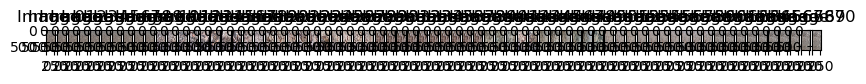

In [124]:
images=load_images(image_dir_path)

fig, axes = plt.subplots(1, len(images), figsize=(10, 5))

for i, image in enumerate(images):
    image_array = np.array(image)
    axes[i].imshow(image_array)
    axes[i].set_title(f"Image {i}")

plt.tight_layout()
plt.show()

In [125]:
#Image --> Image Array Conversin

# # Convert the images to NumPy arrays
# image_arrays = []
# for image in images:
#     image_array = np.array(image)
#     image_arrays.append(image_array)

# # Print the image arrays
# for image_array in image_arrays:
#     print(image_array)

# HSV Split

In [126]:
#Red falls between 0 and 60 degrees.
#Yellow falls between 61 and 120 degrees.
#Green falls between 121 and 180 degrees.
#Cyan falls between 181 and 240 degrees.
#Blue falls between 241 and 300 degrees.
#Magenta falls between 301 and 360 degrees.

In [127]:
def hsv_split(images):
    
    hues = []
    saturation = []
    values = []
    
    
    for image in images:
        hsv_image = image.convert("HSV")
        h,s,v = hsv_image.split()
        
        # Hues
        
        H = np.asarray(h)
        
        h_bucket=[0,0,0,0,0,0,0,0,0]
        
        for i in range(len(H)): 
               
            for j in H[i]:
                
                if j>=0 and j<=11:
                    h_bucket[0]=h_bucket[0]+1
                elif j<=22:
                    h_bucket[1]=h_bucket[1]+1
                elif j<=33:
                    h_bucket[2]=h_bucket[2]+1
                elif j<=44:
                    h_bucket[3]=h_bucket[3]+1                    
                elif j<=86:
                    h_bucket[4]=h_bucket[4]+1
                elif j<=130:
                    h_bucket[5]=h_bucket[5]+1
                elif j<=174:
                    h_bucket[6]=h_bucket[6]+1
                elif j<=218:
                    h_bucket[7]=h_bucket[7]+1
                elif j<=255:
                    h_bucket[8]=h_bucket[8]+1
                    
       # print(h_bucket)
        hues.append(h_bucket)
        
        # Saturation
        
        S = np.asarray(s)
        
        s_bucket=[0,0,0,0,0,0]
        
        for i in range(len(S)): 
               
            for j in S[i]:
                
                if j>=0 and j<=43:
                    s_bucket[0]=s_bucket[0]+1                  
                elif j<=86:
                    s_bucket[1]=s_bucket[1]+1
                elif j<=130:
                    s_bucket[2]=s_bucket[2]+1
                elif j<=174:
                    s_bucket[3]=s_bucket[3]+1
                elif j<=218:
                    s_bucket[4]=s_bucket[4]+1
                elif j<=255:
                    s_bucket[5]=s_bucket[5]+1
                    
       # print(s_bucket)
        saturation.append(s_bucket)
        

        
        
        # Values
        
        V = np.asarray(v)
        
        v_bucket=[0,0,0,0,0,0]
        
        for i in range(len(V)): 
               
            for j in V[i]:
                
                if j>=0 and j<=43:
                    v_bucket[0]=v_bucket[0]+1                    
                elif j<=86:
                    v_bucket[1]=v_bucket[1]+1
                elif j<=130:
                    v_bucket[2]=v_bucket[2]+1
                elif j<=174:
                    v_bucket[3]=v_bucket[3]+1
                elif j<=218:
                    v_bucket[4]=v_bucket[4]+1
                elif j<=255:
                    v_bucket[5]=v_bucket[5]+1
                    
       # print(v_bucket)
        values.append(v_bucket)

        
        
        
    return hues, saturation, values
        

        

In [128]:
def file_saving(root_dir, file_path):
    
    packages()
    
    hsv=hsv_split(load_images(image_dir_path))
    hsv = [[row[i] for row in hsv] for i in range(len(hsv[0]))]
    
    image_names=[]
    
    for i in os.listdir(root_dir):
        if i.endswith(".jpg"):
            image_names.append(i)
            
    data=list(zip(image_names, hsv))
    
    with open(file_path, 'w', newline='') as csvfile:
        # Create a CSV writer
        csv_writer = csv.writer(csvfile)

        # Write a header row (optional, but useful for labeling the columns)
        csv_writer.writerow(["File_Name", "Hues", "Saturation", "Value"])

        # Write the data rows
        csv_writer.writerows(data)

    print(f"Data has been saved to {file_path}")

In [129]:
output_dir=r"C:\Users\POOSHAN CHATTERJEE\Documents\MSc Data Science\Research\outputs\image_data.csv"
file_saving(image_dir_path,output_dir)


Data has been saved to C:\Users\POOSHAN CHATTERJEE\Documents\MSc Data Science\Research\outputs\image_data.csv
